<a href="https://colab.research.google.com/github/NaabiaGuedes/data_science/blob/master/Analisando_os_Dados_do_Airbnb_BERLIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# Análise dos Dados do Airbnb - *BERLIN*

<center><img alt="Analisando Airbnb" width="80%"" src="https://thumbnails.expedia.com/OhBcDc6AiB26vc36s6K9JuJLfGw=/536x384/smart/filters:quality(60)/a.cdn-hotels.com/cos/heroimage/Berlin_0_154961555.jpg"> ></center>


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**! É uma empresa americana de mercado on-line com sede em San Francisco, Califórnia, Estados Unidos. A empresa revoluciona o conceito do mercado de hotelaria.

Com as mudanças de hábitos da humanidade, onde se realiza tudo via internet; a plataforma traz a Conectividade entre pessoas que quer  se hospedar com os que querem alugar seus imóveis de maneira prática. Pensando nisso o  Airbnb fornece uma plataforma inovadora para tornar a hospedagem alternativa.

Em de 2019, a Startup atingiu a marca de já **500 milhões de hóspedes**  ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

O Airbnb é disponibiliza dados do site, para algumas das principais cidades do mundo. Por meio do portal do seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Berlin - Capital da Alemanha, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Os dados utilizados nessa análise são disponíveis publicamente pelo site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) onde permite explorar como a empresa está se comportanto ao redor do mundo.

Para esta análise, será baixado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Boston (good for visualisations).*

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2020-05-14/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head (5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,60,4,132,2020-04-03,2.65,7,180
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,145,2019-06-27,1.09,1,0
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,28,7,27,2019-05-31,0.33,1,364
3,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.24,2,78
4,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53303,13.41605,Entire home/apt,180,6,8,2020-01-04,0.14,1,0


### **Tamanho da amostra (Conjunto de dados)**
Primeiramente vamos identificar o  tamanho das nossas amostras que o nosso conjunto de dados possui.


*   Quantidade de Entradas
*   Tipos de Variáveis



In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 24678
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Mineração de dados**
 Identificaremos a porcentagem de valores ausentes no dataset

*   Ás variáveis reviews_per_month, e  last_review  são as variáveis incompletas, apresentados mais de 18% dos valores nulos  não sendo utilizado na análise.




In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.183807
last_review                       0.183807
name                              0.002026
host_name                         0.000851
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Para visualizarmos a distribuição das variáveis, plotaremos histogramas**
Exibindo a frequência que de cada amostra ocorreu.


*   A disponibilidade de imóveis mudam de acordo com as temporadas;
*   Os preços dos imóveis mudam drasticamente;
*   A quantidade imóveis que possibilitam alugueis a longo prazo.



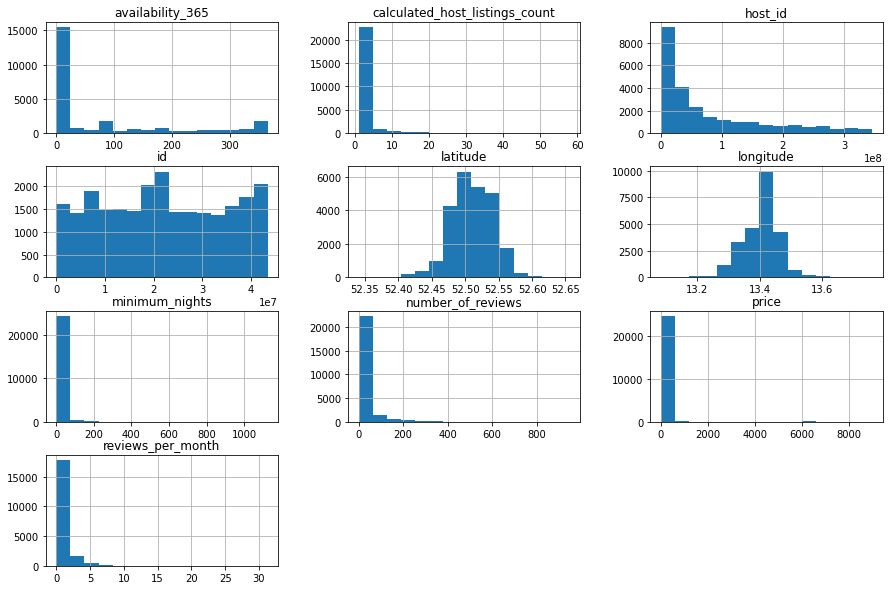

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Identificação de Outliers**
Pela distribuição do histograma as variáveis price, minimum_nights, e calculated_host_listings_count, é possível verificar indícios da presença de outliers (valores atípico).

A existência que valores não seguem uma destruição, implica tipicamente em prejuízo de interpretação e distorcem toda a representação gráfica. Para confirmar a detecção de outliers executaremos as seguintes funções:


*   Resumo estatístico por meio do método describe()
*   Plotar boxplots para a variável.






In [ ]:
# Resumo estatístico por meio do método describe
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24678.000000,24678.000000,24678.000000,20142.000000,24678.000000,24678.000000
mean,75.109409,7.394035,20.983305,0.850179,2.511468,75.013615
std,239.989351,27.988944,45.607124,1.274689,5.652053,118.603012
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,50.000000,3.000000,5.000000,0.370000,1.000000,0.000000
75%,79.000000,4.000000,18.000000,1.010000,2.000000,108.000000
max,9000.000000,1124.000000,950.000000,31.290000,58.000000,365.000000


Com os resultados estatístico acima, podemos concluir que:


*   O maior **PREÇO** (price) apresenta um percentil de  75% dos valores estão abaixo de US$79, mas o valor máximo apresentado é de 9000.
*   A quantidade **MÍNIMA DE NOITES**(minimum_nigths) está acima de 365 dias no ano o percentil está de 4 noites.



**Boxplot para Minimu_nigths**

o Boxplot representa graficamente a quantidade de outlier contém na variável, que são os pontos mais escuros no gráfico.

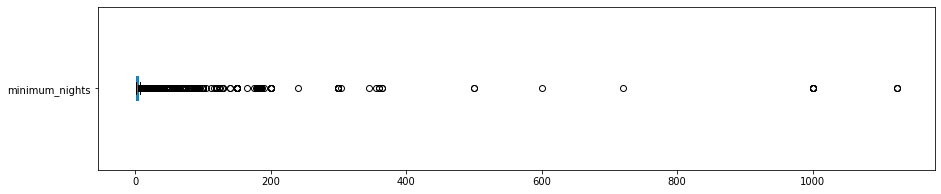

minimum_nights: valores acima de 30:
909 entradas
3.6834%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

**Boxplot para Price**

o Boxplot representa graficamente a quantidade de outlier contém na variável, que são os pontos mais escuros no gráfico.

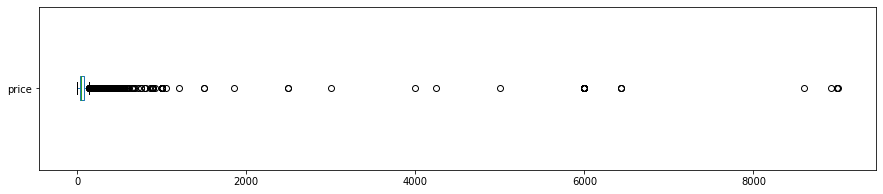


price: valores acima de 1500
35 entradas
0.1418%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

De acordo com o gráfico plotado, podemos visualizar que a presença de *Outlier* são superiores a distribuição do primeiro e terceiro quartil


**Histogramas sem outliers**

Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

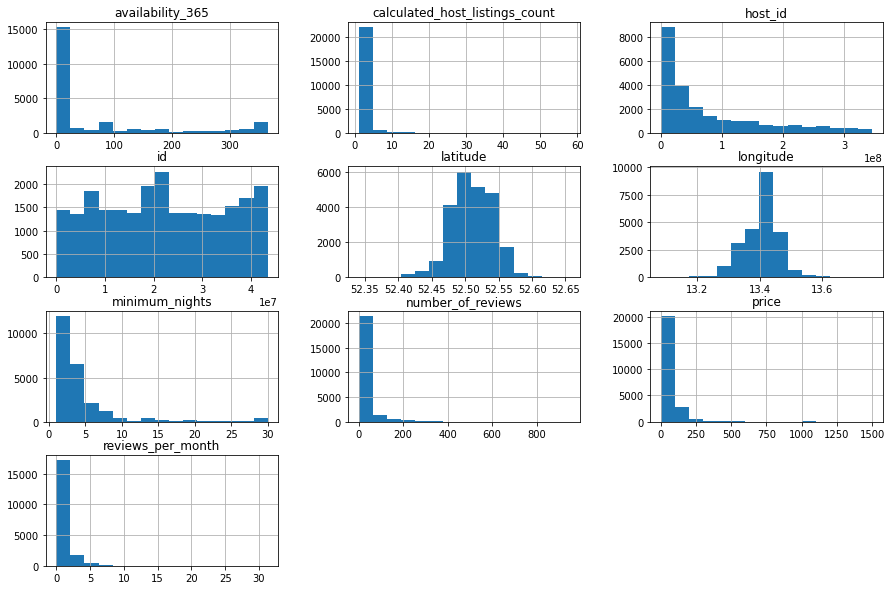

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
# ver a média da coluna `price``


### **Q4. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn


In [ ]:
# criar uma matriz de correlação
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.047682,0.046864,0.115867,0.156278,0.234457
minimum_nights,-0.047682,1.000000,-0.092152,-0.139393,0.053095,0.049828
number_of_reviews,0.046864,-0.092152,1.000000,0.744677,0.076695,0.279835
reviews_per_month,0.115867,-0.139393,0.744677,1.000000,0.145955,0.299003
calculated_host_listings_count,0.156278,0.053095,0.076695,0.145955,1.000000,0.286712
availability_365,0.234457,0.049828,0.279835,0.299003,0.286712,1.000000


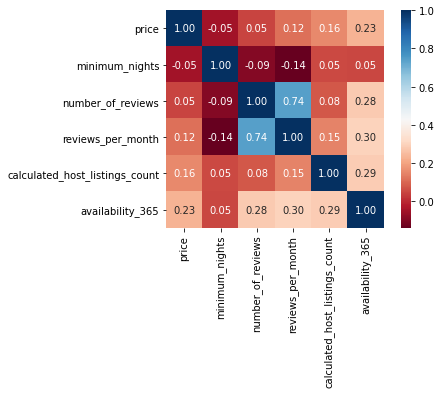

In [ ]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    11962
Private room       11253
Shared room          304
Hotel room           216
Name: room_type, dtype: int64

In [ ]:
#Quais os Bairros mais disponíveis para hospedagens
df_clean.neighbourhood.value_counts()

Frankfurter Allee Süd FK    1386
Tempelhofer Vorstadt        1259
Alexanderplatz              1194
Reuterstraße                1037
Rixdorf                      878
                            ... 
MV 2                           5
Neu-Hohenschönhausen Süd       5
Hellersdorf-Ost                4
Buckow Nord                    4
Allende-Viertel                3
Name: neighbourhood, Length: 136, dtype: int64

Frankfurter Allee Süd FK  e o bairro com mais disponibilidade 

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.503981
Private room       0.474110
Shared room        0.012808
Hotel room         0.009100
Name: room_type, dtype: float64

em Berlin a maioria de disponibilidade e nos home/apt

### **Q6. Qual a localidade mais cara de Berlim?**

*   Haselhorst
*   Alexanderplatz





In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Haselhorst             130.307692
Alexanderplatz         123.676717
Regierungsviertel      115.678571
Allende-Viertel        115.666667
Kurfürstendamm         114.628571
Charlottenburg Nord    108.333333
Rummelsburger Bucht    106.025641
Zehlendorf  Südwest    103.581818
Kantstraße              97.768212
Halensee                96.697917
Name: price, dtype: float64

Haselhorst e o bairro mais caro de Berlim

In [ ]:
# ver quantidade de imóveis no Haselhorst
print(df_clean[df_clean.neighbourhood == "Haselhorst"].shape)

# ver as 3 entradas do Alexanderplatz
df_clean[df_clean.neighbourhood == "Alexanderplatz"]

(13, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
34,54952,Riverfront Panorama,258697,Trent,Alexanderplatz,52.52264,13.38810,Private room,47,4,187,2020-03-06,1.61,1,47
65,111579,IN THE CENTER OF BERLIN.....,570951,S. Kjel,Alexanderplatz,52.52720,13.40953,Entire home/apt,170,5,114,2016-06-05,1.10,1,75
72,127708,Design Jewel in the midst of MITTE!,632174,Stéphanie,Alexanderplatz,52.52536,13.40488,Entire home/apt,89,2,537,2020-03-15,5.18,6,331
76,139769,Mitte Auguststrasse Room Central&Charming,681637,Stefano,Alexanderplatz,52.52811,13.39195,Private room,42,4,256,2020-02-06,2.38,1,341
82,149849,Cosy room in Mitte/Rosenthaler pl.,722460,George,Alexanderplatz,52.52982,13.40260,Private room,40,2,73,2020-03-01,0.69,2,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657,43389069,Berlin Best Central,342126667,Frank,Alexanderplatz,52.52853,13.40880,Entire home/apt,53,3,0,NaN,NaN,3,31
24658,43391925,Renovated Need Apartments,345736067,Vera,Alexanderplatz,52.52564,13.37900,Entire home/apt,69,1,0,NaN,NaN,1,0
24659,43395421,Charming granny location,58354285,Valentin,Alexanderplatz,52.52425,13.39595,Private room,200,1,0,NaN,NaN,1,365
24665,43406762,"Superb view, luxury 4 bed apartment",345913831,Andra,Alexanderplatz,52.51948,13.40560,Entire home/apt,200,3,0,NaN,NaN,1,365


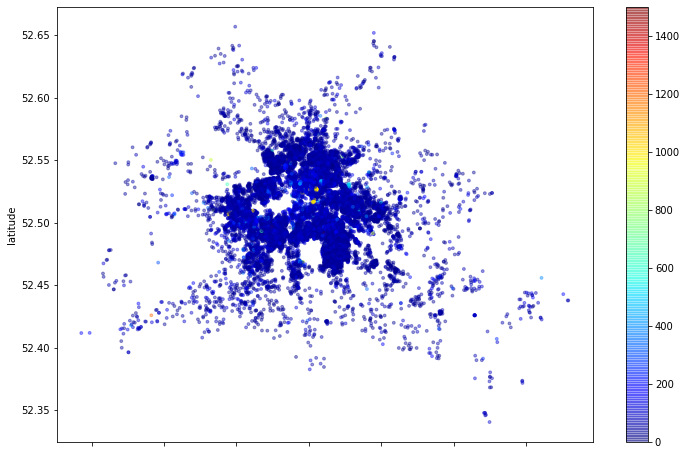

In [ ]:
# plotar os imóveis pela latitude-longitude
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nigdf
df.minimum_nights.mean() 

7.394035173028609

## **Conclusões**
Segundo o resultado da nossa analise o bairro mais caro e o Haselhorst, e o mais em conta e o Halensee.

Conclusões 
Berlin e um dos destinos turístico mais procurados, podemos ver através das analise que a rede hoteleira Airbnb oferece inúmeras vantagens e vários bairros da cidade, que varia de locais extremamente caros, a locais com preços mais em contas como o Bairro de Helensee. A maioria dos hospedagem disponíveis são em home/apt.

Arrume suas malas, faça sua reserva e Boa viagem ......

























